**Business Problem Statement:** A telecommunications company is facing high customer churn rates, which are impacting revenue and customer retention. The company wants to identify factors contributing to churn and develop strategies to reduce it.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pathlib import Path

# Suppress all warnings
warnings.filterwarnings('ignore')
import random 


In [2]:
df=pd.read_csv('../Data/customer_churn_data.csv')

In [3]:
df.shape

(1000, 10)

In [4]:
df.head()

,CustomerID,Age,Location,PlanType,AverageCallDuration,DataUsage,NumberOfCalls,MonthlyCharges,PaymentMethod,ChurnStatus
0,C0001,56,Urban,Basic,26.289402,8.821847,135,69.987056,BankTransfer,No
1,C0002,69,Rural,Basic,16.289559,24.010073,235,65.104664,CreditCard,No
2,C0003,46,Urban,Basic,19.343779,3.233515,230,76.134922,BankTransfer,Yes
3,C0004,32,Suburban,Basic,19.689638,47.147981,220,121.631377,BankTransfer,No
4,C0005,60,Rural,Basic,24.774136,4.203650,34,82.942494,CreditCard,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1000 non-null   object 
 1   Age                  1000 non-null   int64  
 2   Location             1000 non-null   object 
 3   PlanType             1000 non-null   object 
 4   AverageCallDuration  1000 non-null   float64
 5   DataUsage            1000 non-null   float64
 6   NumberOfCalls        1000 non-null   int64  
 7   MonthlyCharges       1000 non-null   float64
 8   PaymentMethod        1000 non-null   object 
 9   ChurnStatus          1000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [6]:
df.describe(include='all')

,CustomerID,Age,Location,PlanType,AverageCallDuration,DataUsage,NumberOfCalls,MonthlyCharges,PaymentMethod,ChurnStatus
count,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000
unique,1000,NaN,3,2,NaN,NaN,NaN,NaN,2,2
top,C1000,NaN,Urban,Basic,NaN,NaN,NaN,NaN,CreditCard,No
freq,1,NaN,470,710,NaN,NaN,NaN,NaN,621,785
mean,NaN,49.857000,NaN,NaN,16.075521,24.501223,150.261000,84.296789,NaN,NaN
std,NaN,18.114267,NaN,NaN,8.236725,14.403498,83.508038,37.415142,NaN,NaN
min,NaN,18.000000,NaN,NaN,1.012841,0.509233,10.000000,20.509389,NaN,NaN
25%,NaN,35.000000,NaN,NaN,9.199405,11.979636,79.750000,51.639004,NaN,NaN
50%,NaN,50.000000,NaN,NaN,16.653440,23.997300,149.000000,83.955434,NaN,NaN
75%,NaN,66.000000,NaN,NaN,23.116538,37.070607,221.000000,115.935954,NaN,NaN


In [7]:
numerical_columns = ['Age','AverageCallDuration','DataUsage','NumberOfCalls','MonthlyCharges']
categorical_columns = ['Location','PlanType','PaymentMethod']
target_column = ['ChurnStatus']

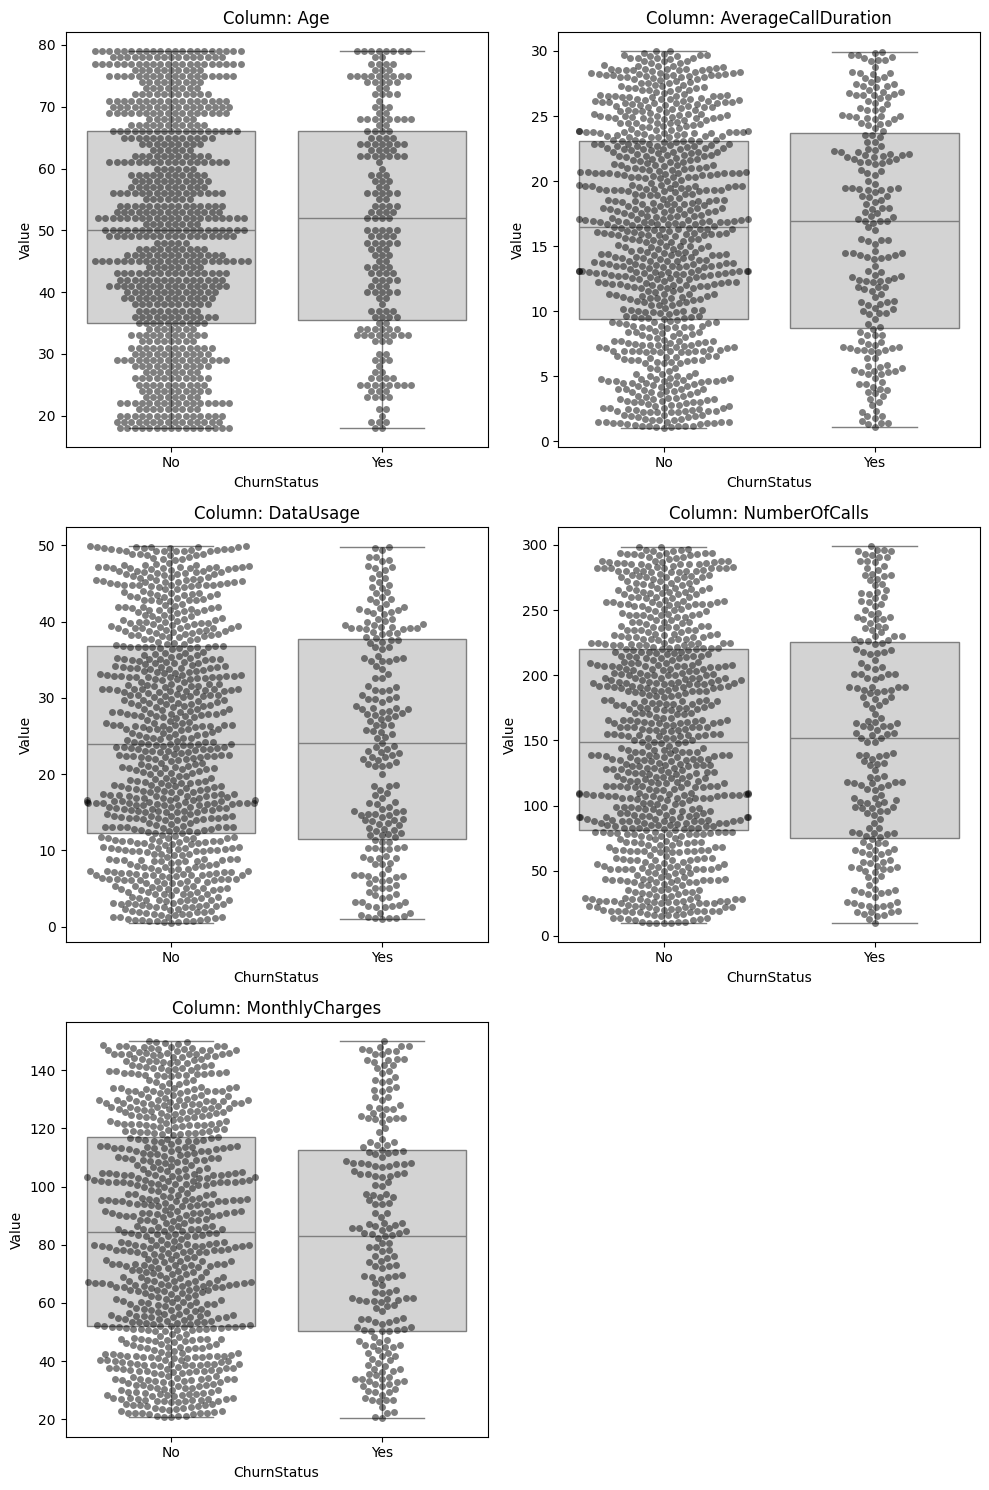

In [8]:
# Set the number of rows and columns for subplots (based on number of categories)
n_cols = 2  # Number of columns in the subplot grid
n_rows = 3  # Number of rows needed for the subplots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through each category and create a plot
for idx, col in enumerate(numerical_columns):
    # Subset the data for the current category


    # Plot the data
    sns.boxplot(x=target_column[0], y=col, data=df, color='lightgray',ax=axes[idx])  # Boxplot with light gray color
    sns.swarmplot(x=target_column[0], y=col, data=df, color='black', alpha=0.5,ax=axes[idx])
    axes[idx].set_title(f'Column: {col}')
    axes[idx].set_ylabel('Value')
    axes[idx].set_xlabel(target_column[0])

# Remove empty subplots if the number of categories doesn't fit evenly
for idx in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()  # Adjust layout
plt.show()

After observing the above visualizations we can conclude that the above numerical independent columns 
are approximately uniformly distributed aganist to the target variable like Churn Status . 
All visulaizations seems to similar in ratio . 
So , we can conclude that independently these numerical columns are not showing much or desired impact on the 
Customer Churn .

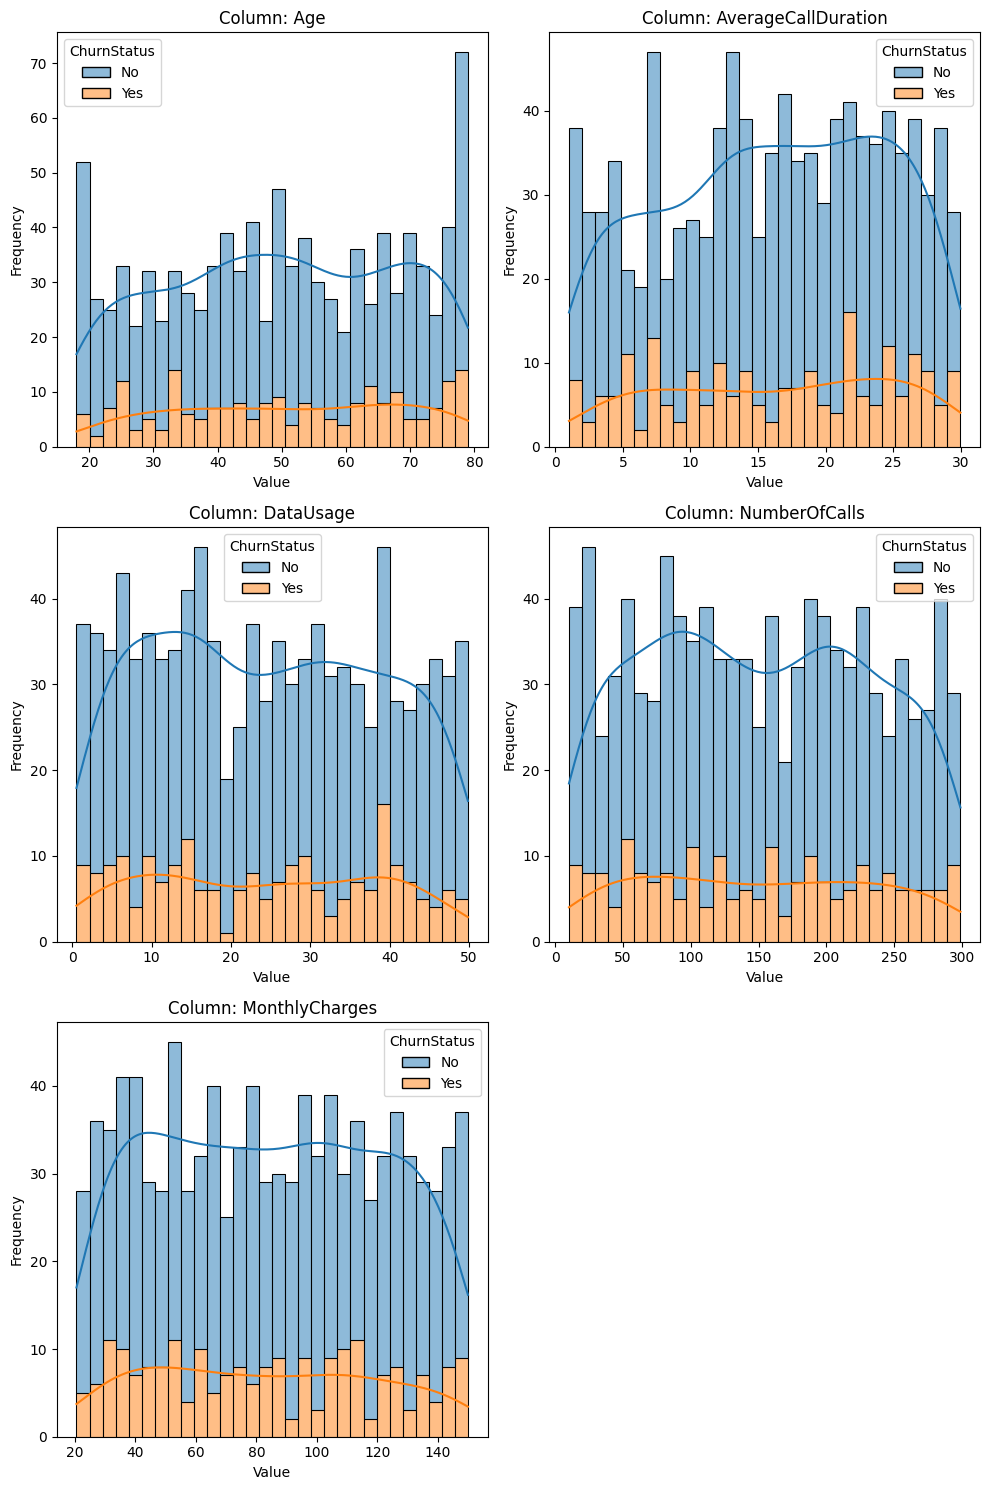

In [9]:
# Set the number of rows and columns for subplots (based on number of categories)
n_cols = 2  # Number of columns in the subplot grid
n_rows = 3  # Number of rows needed for the subplots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through each category and create a plot
for idx, col in enumerate(numerical_columns):
    # Subset the data for the current category


    # Plot the data
    sns.histplot(df, x=col, hue=target_column[0], kde=True, ax=axes[idx], multiple='stack', bins=30)
    axes[idx].set_title(f'Column: {col}')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_xlabel('Value')

# Remove empty subplots if the number of categories doesn't fit evenly
for idx in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()  # Adjust layout
plt.show()

After observing the above visualizations we can conclude that the above numerical independent columns 
are approximately uniformly distributed across the range of data aganist to the target variable like Churn Status . 


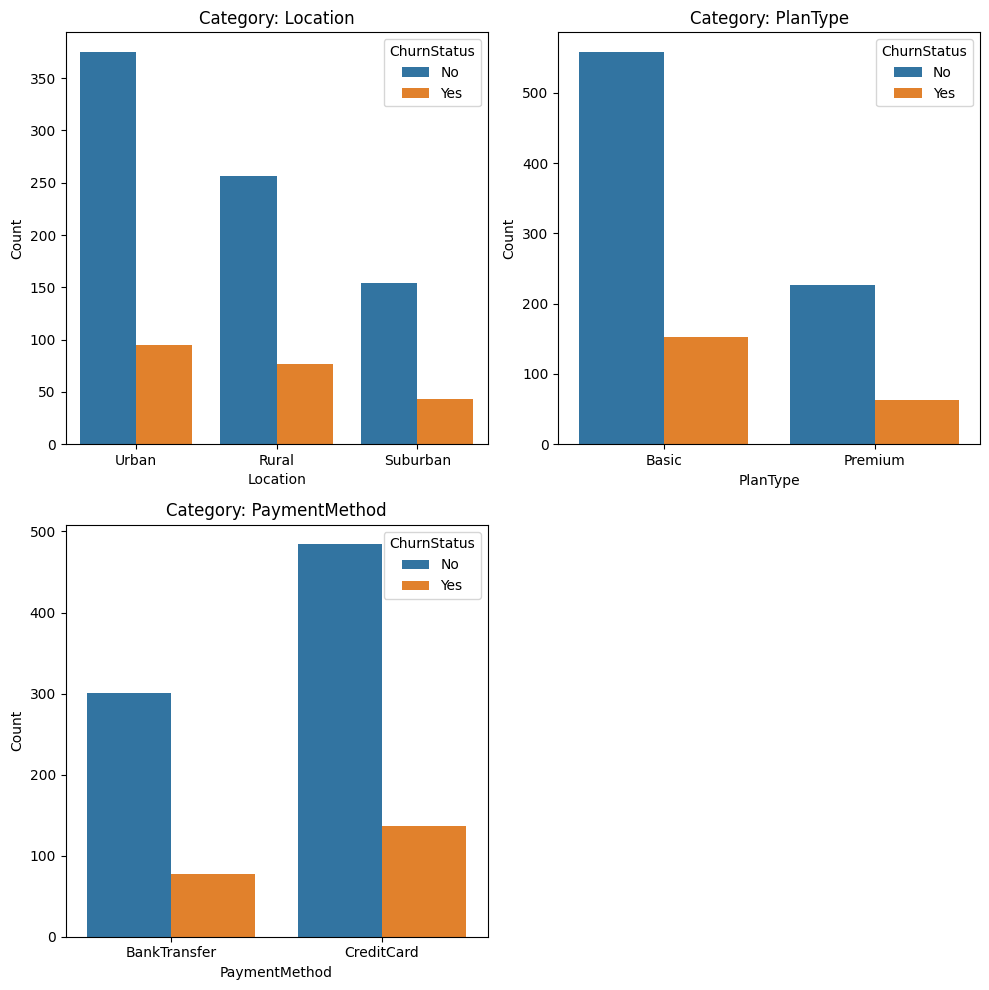

In [10]:
# Set the number of rows and columns for subplots (based on number of categories)
n_cols = 2  # Number of columns in the subplot grid
n_rows = 2  # Number of rows needed for the subplots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through each category and create a plot
for idx, col in enumerate(categorical_columns):
    # Subset the data for the current category


    # Plot the data
    sns.countplot(x=col, hue=target_column[0], data=df,ax=axes[idx])
    axes[idx].set_title(f'Category: {col}')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xlabel(col)

# Remove empty subplots if the number of categories doesn't fit evenly
for idx in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()  # Adjust layout
plt.show()

After observing the above visualizations we can conclude that the above Categorical independent columns 
are approximately similarly distributed aganist to the categories of the target variable like Churn Status . 
All visulaizations seems to similar in  ratio . 
So , we can conclude that independently these categorical columns are not showing much or desired impact on the 
Customer Churn .

Independently the distribution of the features are not showing meaning full patterns aganist to the target variable like Customer Churn .
So , further to get more insights we can go with the predictive analytics .